In [93]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"firazafifudin","key":"cfb6e580069f5d4f15b60885906cc4c5"}'}

In [94]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [95]:
!kaggle datasets download -d antoniuscs/imdb-synopsis-indonesian-movies

Dataset URL: https://www.kaggle.com/datasets/antoniuscs/imdb-synopsis-indonesian-movies
License(s): copyright-authors
imdb-synopsis-indonesian-movies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [96]:
!mkdir imdb-synopsis-indonesian-movies
!unzip imdb-synopsis-indonesian-movies -d imdb-synopsis-indonesian-movies
!ls imdb-synopsis-indonesian-movies

mkdir: cannot create directory ‘imdb-synopsis-indonesian-movies’: File exists
Archive:  imdb-synopsis-indonesian-movies.zip
replace imdb-synopsis-indonesian-movies/imdb_indonesian_movies_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imdb-synopsis-indonesian-movies/imdb_indonesian_movies_2.csv  
imdb_indonesian_movies_2.csv


In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

In [98]:
df = pd.read_csv('/content/imdb-synopsis-indonesian-movies/imdb_indonesian_movies_2.csv')

In [99]:
df = df.drop(columns=['judul_film'])

In [100]:
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [101]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,True,False,False,False,False
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,True,False,False,False,False
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,True,False,False,False,False
3,POL menceritakan kisah hidup yang luar biasa d...,True,False,False,False,False
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,True,False,False,False,False
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,False,False,False,False,True
1001,Markonah melarikan diri ke Jakarta karena akan...,False,False,False,False,True
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",False,False,False,False,True
1003,Proyek baru ini adalah tentang seorang lelaki ...,False,False,False,False,True


In [102]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [103]:
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [104]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [105]:
input_length = padded_latih.shape[1]
model =tf.keras.Sequential([
     tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
     tf.keras.layers.LSTM(64),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(5, activation='softmax')
])

In [106]:
model.build(input_shape=(None, input_length))

In [107]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 1765, 16)       │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,637 (459.52 KB)

 Trainable params: 117,637 (459.52 KB)

 Non-trainable params: 0 (0.00 B)

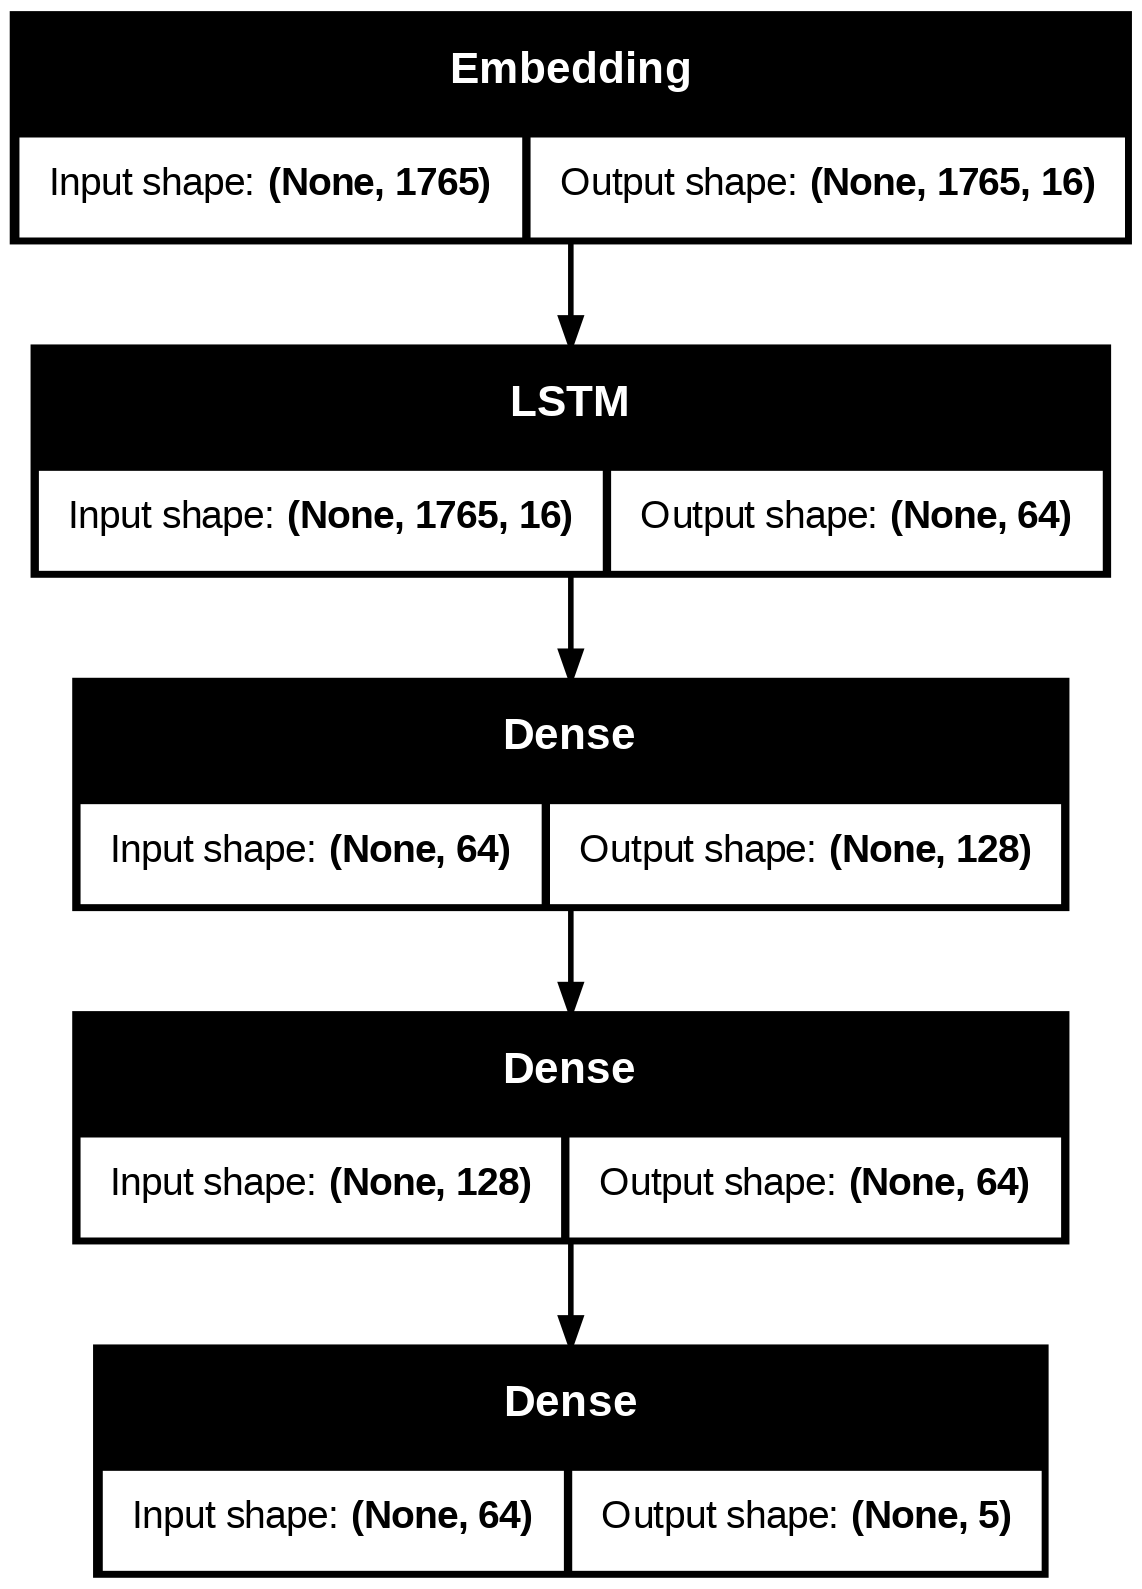

In [109]:
plot_model (model, show_shapes = True)

In [110]:
history = model.fit(padded_latih, label_latih, epochs=15,
          validation_data=(padded_test, label_test))

Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 642ms/step - accuracy: 0.2092 - loss: 1.6097 - val_accuracy: 0.1692 - val_loss: 1.6114
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 673ms/step - accuracy: 0.2506 - loss: 1.6058 - val_accuracy: 0.1841 - val_loss: 1.6099
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 658ms/step - accuracy: 0.3706 - loss: 1.5809 - val_accuracy: 0.2338 - val_loss: 1.6063
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 677ms/step - accuracy: 0.4667 - loss: 1.3957 - val_accuracy: 0.2935 - val_loss: 1.6192
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 651ms/step - accuracy: 0.6981 - loss: 1.1172 - val_accuracy: 0.3433 - val_loss: 1.6378
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 652ms/step - accuracy: 0.8045 - loss: 0.7457 - val_accuracy: 0.3433 - val_loss: 1.6566
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 670ms/step - accuracy: 0.9402 - loss: 0.3273 - val_accuracy: 0.3483 - val_loss: 2.3156
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 674ms/step - accuracy: 0.9531 - loss: 0.1976 - val_accu

In [111]:
hasil = ["Kisah cinta antara dua yuppies urban yang sinis yang harus saling barhadapan sebagai pengacara di ruang sidang"]
hasil = tokenizer.texts_to_sequences(hasil)
hasil = pad_sequences(hasil)
#print (model.predict(hasil))
hasil = np.argmax(model.predict(hasil), axis=1)
if hasil == [0]:
  print('Drama')
if hasil == [1]:
  print('Horor')
if hasil == [2]:
  print('Komedi')
if hasil == [3]:
  print('Laga')
if hasil == [4]:
  print('Romantis')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Romantis
